In [58]:
import pandas as pd

data_path = '/Users/sola/Downloads/open/'

# index_col은 불러올 데이터프레임의 인덱스를 지정하는 파라미터, 열이름을 전달하면 해당 열을 인덱스로 지정한다.
train = pd.read_csv(data_path + 'train.csv', parse_dates=['TIMESTAMP'], dayfirst=True ,infer_datetime_format=True, index_col='PRODUCT_ID')
test = pd.read_csv(data_path + 'test.csv', parse_dates=['TIMESTAMP'], dayfirst=True ,infer_datetime_format=True, index_col='PRODUCT_ID')

submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='PRODUCT_ID')


In [59]:
train.shape, test.shape

((598, 2880), (310, 2878))

In [60]:
train.head()

,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
PRODUCT_ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,1,0.533433,2022-06-13 05:14:00,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
TRAIN_001,2,0.541819,2022-06-13 05:22:00,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
TRAIN_002,1,0.531267,2022-06-13 05:30:00,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
TRAIN_003,2,0.537325,2022-06-13 05:39:00,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
TRAIN_004,1,0.531590,2022-06-13 05:47:00,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [61]:
submission.head()

,Y_Class
PRODUCT_ID,
TEST_000,0
TEST_001,0
TEST_002,0
TEST_003,0
TEST_004,0


## 데이터시각화

In [62]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

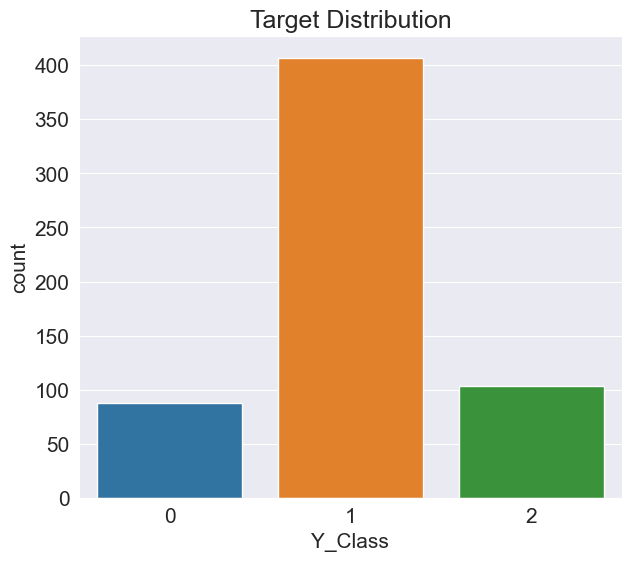

In [63]:
# 타깃값 분포 시각화
mpl.rc('font', size =15)
plt.figure(figsize=(7,6))

#타깃값 분포 카운트플롯
ax = sns.countplot(x='Y_Class', data=train)
ax.set_title('Target Distribution')

In [64]:
print(ax.patches)

<Axes.ArtistList of 3 patches>


In [65]:
rectangle = ax.patches[0]
print("사각형높이", rectangle.get_height())
print("사각형너비", rectangle.get_width())
print("사각형 왼쪽 테두리의 x축 위치", rectangle.get_x())

사각형높이 88
사각형너비 0.8
사각형 왼쪽 테두리의 x축 위치 -0.4


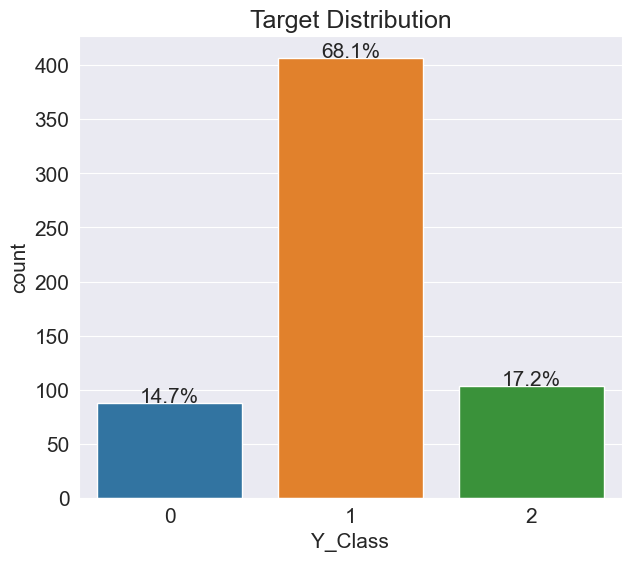

In [66]:
# 도형 객체를 순회하며 막때 상단에 타깃값 비율 표시
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(x=left_coord+width/2.0,
                y=height+total_size*0.001,
                s=f'{percent:1.1f}%',
                ha='center')
plt.figure(figsize=(7,6))

ax = sns.countplot(x='Y_Class', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution');

In [67]:
x_columns = []
# for i in range(575):
#     for j in range(5):
#         co = "X_" + str(i)
#         x_columns.append(co)

for i in range(1,2876):
    co = "X_" + str(i)
    x_columns.append(co)


start_pos = 0
end_pos = len(x_columns)
div = 5
div_columns=[]
for idx in range(start_pos, end_pos + div, div):
    out = x_columns[start_pos:start_pos + div]
    if out != []:
        div_columns.append(out)
        # print(out)
    start_pos = start_pos + div

print(div_columns)



[['X_1', 'X_2', 'X_3', 'X_4', 'X_5'], ['X_6', 'X_7', 'X_8', 'X_9', 'X_10'], ['X_11', 'X_12', 'X_13', 'X_14', 'X_15'], ['X_16', 'X_17', 'X_18', 'X_19', 'X_20'], ['X_21', 'X_22', 'X_23', 'X_24', 'X_25'], ['X_26', 'X_27', 'X_28', 'X_29', 'X_30'], ['X_31', 'X_32', 'X_33', 'X_34', 'X_35'], ['X_36', 'X_37', 'X_38', 'X_39', 'X_40'], ['X_41', 'X_42', 'X_43', 'X_44', 'X_45'], ['X_46', 'X_47', 'X_48', 'X_49', 'X_50'], ['X_51', 'X_52', 'X_53', 'X_54', 'X_55'], ['X_56', 'X_57', 'X_58', 'X_59', 'X_60'], ['X_61', 'X_62', 'X_63', 'X_64', 'X_65'], ['X_66', 'X_67', 'X_68', 'X_69', 'X_70'], ['X_71', 'X_72', 'X_73', 'X_74', 'X_75'], ['X_76', 'X_77', 'X_78', 'X_79', 'X_80'], ['X_81', 'X_82', 'X_83', 'X_84', 'X_85'], ['X_86', 'X_87', 'X_88', 'X_89', 'X_90'], ['X_91', 'X_92', 'X_93', 'X_94', 'X_95'], ['X_96', 'X_97', 'X_98', 'X_99', 'X_100'], ['X_101', 'X_102', 'X_103', 'X_104', 'X_105'], ['X_106', 'X_107', 'X_108', 'X_109', 'X_110'], ['X_111', 'X_112', 'X_113', 'X_114', 'X_115'], ['X_116', 'X_117', 'X_118'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

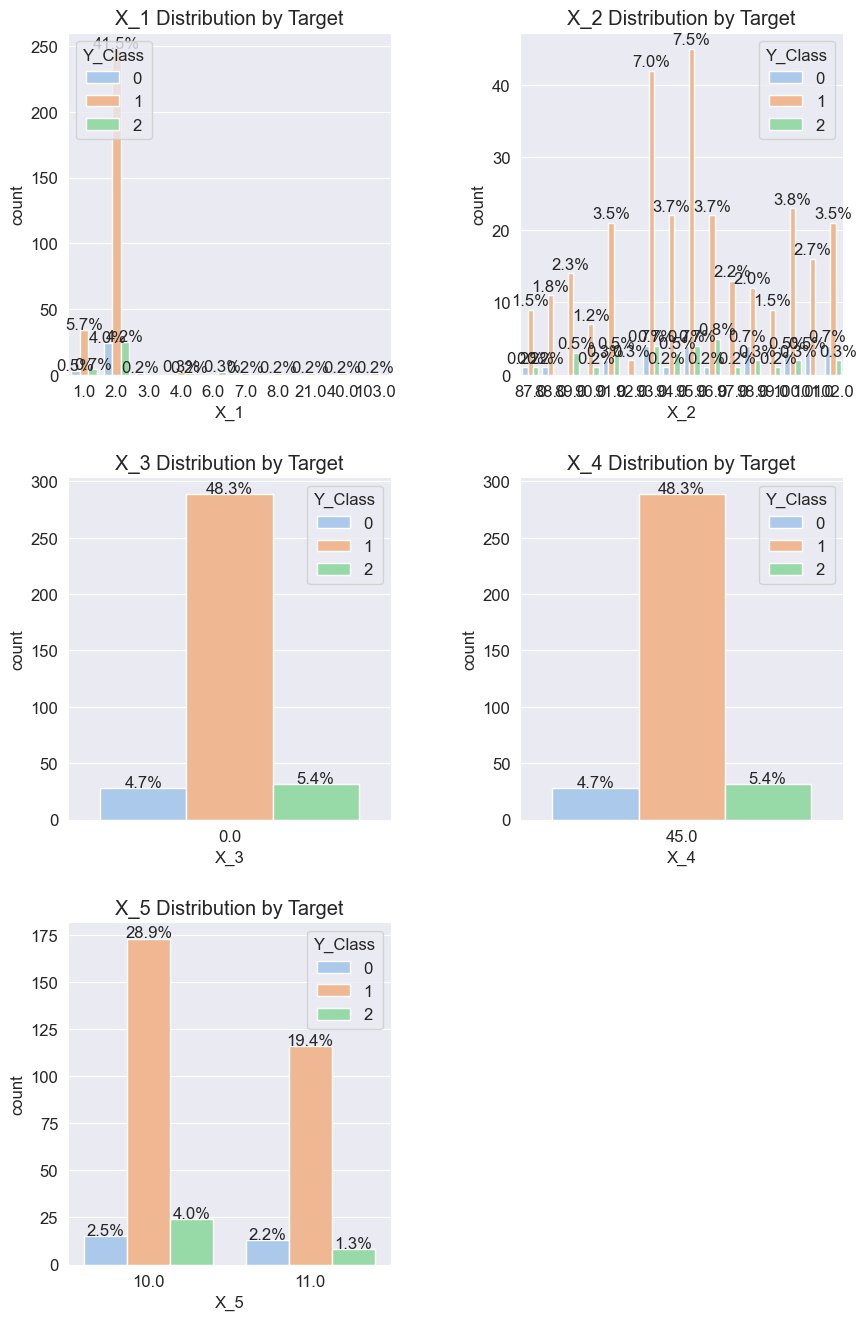

In [68]:
# 이진 피처 분포

import matplotlib.gridspec as gridspec

for i in range(1):
    mpl.rc('font', size=12)
    grid=gridspec.GridSpec(3,2)
    plt.figure(figsize=(10,16))
    plt.subplots_adjust(wspace=0.4, hspace=0.3) #상하좌우여백

    x_feature = div_columns[i]

    for idx, feature in enumerate(x_feature):
        ax=plt.subplot(grid[idx])

        sns.countplot(x=feature, data=train, hue='Y_Class',palette='pastel', ax=ax)

        ax.set_title(f"{feature} Distribution by Target")
        write_percent(ax, len(train))


In [69]:
#교차분석
def get_crosstab(df, feature):
    ct = pd.crosstab(train[feature], train['Y_Class'], normalize='index') * 100
    ct = ct.reset_index()
    return ct

In [70]:
ct1 = get_crosstab(train, 'X_1')
ct1

Y_Class,X_1,0,1,2
0,1.0,7.317073,82.926829,9.756098
1,2.0,8.080808,83.501684,8.417508
2,3.0,100.000000,0.000000,0.000000
3,4.0,0.000000,66.666667,33.333333
4,6.0,0.000000,0.000000,100.000000
5,7.0,0.000000,100.000000,0.000000
6,8.0,0.000000,100.000000,0.000000
7,21.0,0.000000,100.000000,0.000000
8,40.0,0.000000,100.000000,0.000000
9,103.0,0.000000,100.000000,0.000000


In [71]:
ct2 = get_crosstab(train, 'X_2')
ct2

Y_Class,X_2,0,1,2
0,87.0,9.090909,81.818182,9.090909
1,88.0,8.333333,91.666667,0.000000
2,89.0,0.000000,82.352941,17.647059
3,90.0,0.000000,87.500000,12.500000
4,91.0,7.692308,80.769231,11.538462
5,92.0,0.000000,100.000000,0.000000
6,93.0,8.000000,84.000000,8.000000
7,94.0,3.846154,84.615385,11.538462
8,95.0,7.547170,84.905660,7.547170
9,96.0,3.571429,78.571429,17.857143


In [72]:
ct3 = get_crosstab(train, 'X_3')
ct3

Y_Class,X_3,0,1,2
0,0.0,8.022923,82.808023,9.169054


In [73]:
# 피처 엔지니어링 실시

# 일단 데이터 합치기
train_df = train.drop(['Y_Class', 'Y_Quality'], axis=1)
all_data = pd.concat([train, test])
all_data

,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
PRODUCT_ID,,,,,,,,,,,,,,,,,,,,,
TRAIN_000,1.0,0.533433,2022-06-13 05:14:00,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
TRAIN_001,2.0,0.541819,2022-06-13 05:22:00,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
TRAIN_002,1.0,0.531267,2022-06-13 05:30:00,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
TRAIN_003,2.0,0.537325,2022-06-13 05:39:00,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
TRAIN_004,1.0,0.531590,2022-06-13 05:47:00,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_305,NaN,NaN,2022-11-05 11:18:00,T100306,T_31,2.0,91.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEST_306,NaN,NaN,2022-11-05 16:39:00,T100304,T_31,2.0,96.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEST_307,NaN,NaN,2022-11-05 16:47:00,T100306,T_31,2.0,91.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

In [75]:
# 데이터 나누기
num_train = len(train) #훈련데이터개수

#훈련데이터랑 테스트랑 나누기
X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y= train['Y_Class']

In [76]:
from sklearn.model_selection import train_test_split

#훈련데이터, 검증데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1,stratify=y, random_state=37)
#stratisfy는 y값을 기주으로 훈련 데이터와 검증 데이터에 같은 비율로 포함되게끔 나눠준다.


In [77]:
# 모델 훈련

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=37)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=37)

In [78]:
# 모델 성능 검증
# predict_proba()메서드는 예측 확률을 반환한다. → 시그모이드 함수의값을 반환한다.
lr.predict_proba(X_valid)

array([[3.56518524e-02, 8.11016274e-01, 1.53331874e-01],
       [3.87536525e-03, 9.95476436e-01, 6.48198983e-04],
       [2.56693214e-01, 7.06798536e-01, 3.65082502e-02],
       [5.84165921e-03, 1.34573945e-01, 8.59584396e-01],
       [3.05945455e-03, 9.92804721e-01, 4.13582404e-03],
       [8.63710197e-01, 1.12709861e-01, 2.35799416e-02],
       [1.12098254e-02, 9.83614579e-01, 5.17559573e-03],
       [2.40405582e-03, 9.97377830e-01, 2.18114040e-04],
       [2.63618139e-02, 7.99995591e-01, 1.73642595e-01],
       [1.23973710e-02, 8.02440332e-01, 1.85162297e-01],
       [1.35072995e-02, 8.38945155e-01, 1.47547545e-01],
       [1.62895464e-01, 8.22035469e-01, 1.50690674e-02],
       [6.40878111e-01, 3.19899331e-01, 3.92225580e-02],
       [7.24471013e-03, 9.77459477e-01, 1.52958125e-02],
       [1.95088162e-02, 8.04303807e-01, 1.76187377e-01],
       [4.21537867e-02, 9.46693785e-01, 1.11524288e-02],
       [2.80861976e-03, 8.14263490e-04, 9.96377117e-01],
       [1.12137593e-03, 9.98191

In [79]:
print(lr.predict(X_valid))

[1 1 1 2 1 0 1 1 1 1 1 1 0 1 1 1 2 1 1 1 2 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 2 1 2 2 1 0 1 2 1 1 1 1 1 1 1 1 1]


In [80]:
# 검증 데이터를 활용한 타깃 예측
# y_valid_preds = lr.predict_proba(X_valid)[:,1]

In [81]:
# 타깃예측값인 y_vaild_preds와 실제 타깃값인 y_valid 이용해서 모델 성능 검증
# from sklearn.metrics import roc_auc_score #ROC AUC 점수 계산 함수
#
# roc_auc = roc_auc_score(y_valid, y_valid_preds, multi_class='ovr')
#
# print(f"검증데이터 ROC AUC : {roc_auc:.4f}")

In [82]:
# 타깃값 1일 확률 예측
# y_preds = lr.predict_proba(X_test)

In [85]:
print(lr.predict(X_test))
preds=lr.predict(X_test)

[1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [88]:
submit = pd.read_csv('/Users/sola/Downloads/open/sample_submission.csv')
submit['Y_Class'] = preds
submit.to_csv('/Users/sola/Downloads/open/baseline_submission5.csv', index=False)

5번째 제출은. 범주형데이터이진분류에서 베이스라인만을 사용.
-> 정확도는 0.5024487756 ㅠㅠ 너무 낮다.

## 이제 성능을 개선해보자...!
1. 피처 맞춤 인코딩
2. 피처 스케일링
3. 하이퍼파라미터 최적화